# Applications in Finance

    1. Data preprocessing
    2. Regression / ML
    3. Processing many stock
    4. Visualize results


In [145]:
# import package
from datetime import date,timedelta
from urllib.request import urlopen
from dateutil import rrule
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import json
import time


'''
urllib - 提供網頁存取，讓網頁類似於文件操作
dateutil - rrule提供自定義的規則方便生成datetime
matplotlib - 繪製圖表
pandas - 建立系統化的表格資訊，方便後續資料應用
datetime - 處理和日期相關的資訊
json - 爬取json格式的資料

json是一種輕量級的數據交換格式，將資料使用鍵值對組成，格式非常簡單，
很適合用來爬取大量的表格資訊。這邊使用json的原因是希望能讓爬取方式更多樣性，
此外，使用json也不會有之前爬取html時得濾掉額外表格的工作。
'''

'\nurllib - 提供網頁存取，讓網頁類似於文件操作\ndateutil - rrule提供自定義的規則方便生成datetime\nmatplotlib - 繪製圖表\npandas - 建立系統化的表格資訊，方便後續資料應用\ndatetime - 處理和日期相關的資訊\njson - 爬取json格式的資料\n\njson是一種輕量級的數據交換格式，將資料使用鍵值對組成，格式非常簡單，\n很適合用來爬取大量的表格資訊。這邊使用json的原因是希望能讓爬取方式更多樣性，\n此外，使用json也不會有之前爬取html時得濾掉額外表格的工作。\n'

In [159]:
# 爬取每月股價的目標網站並包裝成函式
def craw_one_month(stock_number, date):
    url = (
        "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+
        date.strftime('%Y%m%d')+
        "&stockNo="+
        str(stock_number)
    )
    try:
        data = json.loads(urlopen(url).read())
        return pd.DataFrame(data['data'],columns=data['fields'])
    except:
        print("Error")
        return pd.DataFrame({})

In [160]:
def convert_unit(text):
    
    text_list = text.split(',')
    
    res = 0
    for idx, val in enumerate(text_list[::-1]):
        res += 10**(idx*3) * int(val)
    
    return res

convert_unit('1,126,321')

1126321

In [161]:
# 根據使用者輸入的日期，以月為單位，重複呼叫爬取月股價的函式
def craw_stock(stock_number, start_month):
    b_month = date(*[int(x) for x in start_month.split('-')])
    now = datetime.datetime.now().strftime("%Y-%m-%d")         # 取得現在時間
    e_month = date(*[int(x) for x in now.split('-')])
    
    result = pd.DataFrame()
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        print(dt)
        result = pd.concat([result, craw_one_month(stock_number, dt)], ignore_index=True)
        time.sleep(10 + np.random.random());
    
    return result

target_stock = '3711'
df = craw_stock(target_stock, "2021-01-01")
df.columns = ['Date', 'Volume', 'TotalM', 'Open', 'High', 'Low', 'Close', 'Diff', 'Volume_Lcal']
df['Date'] = df['Date'].apply(lambda x: str(int(x.split("/")[0]) + 1911) + "-" + x.split("/")[1] + "-" + x.split("/")[2])
df['Volume'] = df['Volume'].apply(convert_unit) / 1000
df.set_index("Date", inplace=True)
df = df.drop(columns=['Volume_Lcal', 'TotalM', 'Diff'])
df

2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00
2021-06-01 00:00:00
2021-07-01 00:00:00
2021-08-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00
2022-01-01 00:00:00
2022-02-01 00:00:00
2022-03-01 00:00:00
2022-04-01 00:00:00
2022-05-01 00:00:00
2022-06-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00


,Volume,Open,High,Low,Close
Date,,,,,
2021-01-04,33994.375,82.00,84.50,81.80,83.90
2021-01-05,45299.069,83.90,87.00,83.60,86.60
2021-01-06,66853.975,88.00,90.50,87.00,88.50
2021-01-07,35177.023,90.00,91.00,89.00,89.40
2021-01-08,41704.167,90.60,90.60,87.50,88.00
...,...,...,...,...,...
2022-09-28,12632.177,81.50,81.80,78.20,78.20
2022-09-29,11878.455,80.00,80.70,78.50,78.90
2022-09-30,13604.012,78.10,80.40,77.70,80.10


Text(0, 0.5, 'stock')

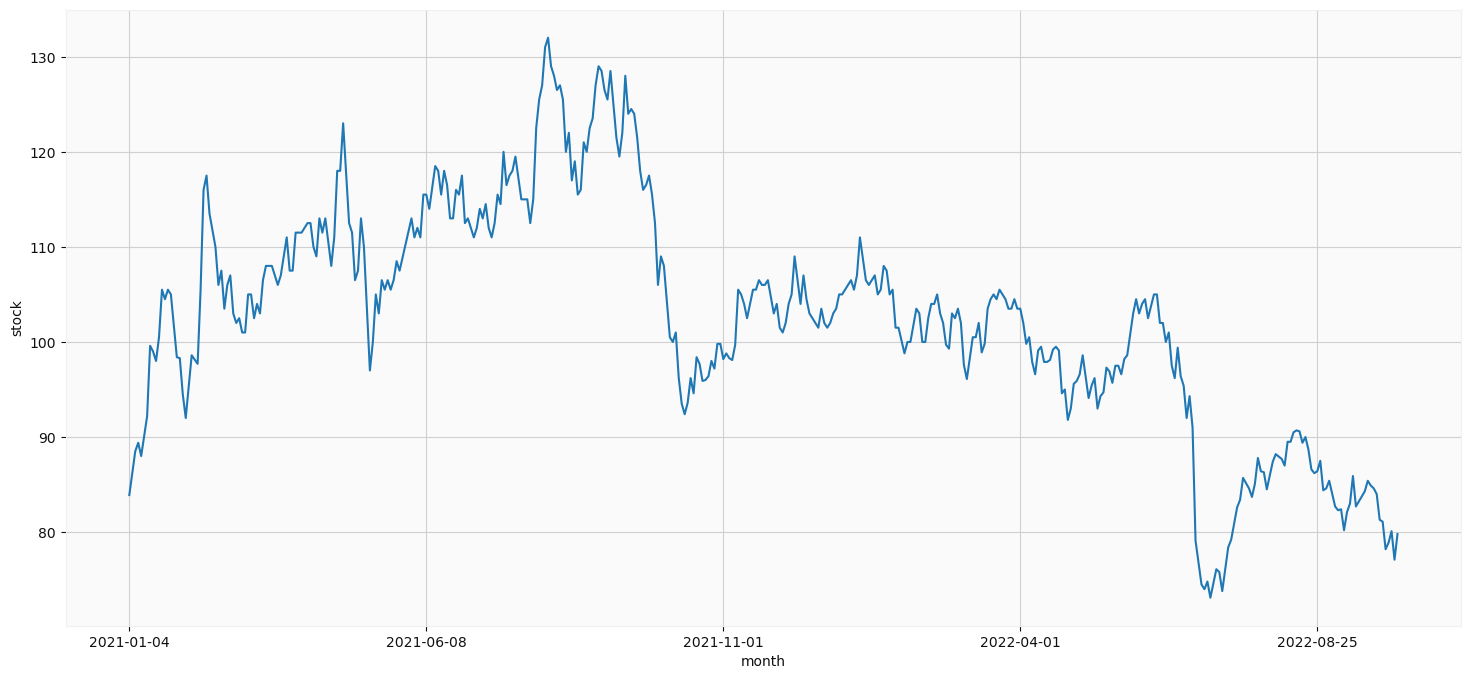

In [162]:
# 將爬取到的歷年股價資訊繪成圖表
df['Close'] = df['Close'].astype(float)
df.loc[:]['Close'].plot(figsize=(18, 8))
plt.xlabel('month')
plt.ylabel('stock')

In [163]:
df.to_csv(f"../../data/{target_stock}.csv")

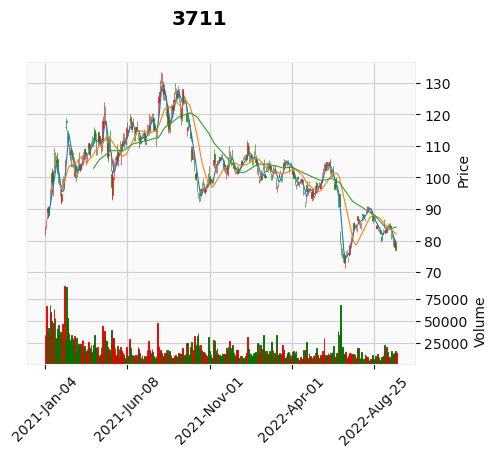

In [164]:
import pandas as pd
import matplotlib
import mplfinance as mpf
# 導入pandas、matplotlib、mplfinance模組，將mplfinance模組縮寫為mpf
# 這邊要導入matplotlib的原因是因為mplfinance繪圖時需要調用mptplotlib模組

#target_stock = '3711' #設定要繪製走勢圖的股票

df2 = pd.read_csv(f'../../data/{target_stock}.csv', index_col=0, parse_dates=True) #讀取目標股票csv檔的位置
df2['Volume'] = df2['Volume'].astype(int)

#df.rename(columns={'Turnover':'Volume'}, inplace = True) 
#這裡針對資料表做一下修正，因為交易量(Turnover)在mplfinance中須被改為Volume才能被認出來

mc = mpf.make_marketcolors(up='r',down='g',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc)
#針對線圖的外觀微調，將上漲設定為紅色，下跌設定為綠色，符合台股表示習慣
#接著把自訂的marketcolors放到自訂的style中，而這個改動是基於預設的yahoo外觀

kwargs = dict(type='candle', mav=(5,20,60), volume=True, figratio=(10,8), figscale=0.75, title=target_stock, style=s) 
#設定可變參數kwargs，並在變數中填上繪圖時會用到的設定值

mpf.plot(df2, **kwargs)
#選擇df資料表為資料來源，帶入kwargs參數，畫出目標股票的走勢圖

In [165]:
df2

,Volume,Open,High,Low,Close
Date,,,,,
2021-01-04,33994,82.0,84.5,81.8,83.9
2021-01-05,45299,83.9,87.0,83.6,86.6
2021-01-06,66853,88.0,90.5,87.0,88.5
2021-01-07,35177,90.0,91.0,89.0,89.4
2021-01-08,41704,90.6,90.6,87.5,88.0
...,...,...,...,...,...
2022-09-28,12632,81.5,81.8,78.2,78.2
2022-09-29,11878,80.0,80.7,78.5,78.9
2022-09-30,13604,78.1,80.4,77.7,80.1
